In [1]:
import pandas as pd
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

In [2]:
try:
    classifier = pipeline("zero-shot-classification", device = -1)
except RuntimeError:
    print("A runtime error occurred, check if tensorflow and pytorch are correctly installed, need to be version >= 2")

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

In [15]:
df_original  = pd.read_csv(r'copy.csv')

In [18]:
# Dataprocessing should be inputted here, see Clara's code
df_name = df_original.head(500)

,Unnamed: 0,id,count,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,0,0,3,2,rt : as a woman you shouldn't complain about ...
1,1,1,3,0,3,0,1,rt : boy dats cold
2,2,2,3,0,3,0,1,rt dawg rt : you ever fuck a bitch and she s...
3,3,3,3,0,2,1,1,rt _g_anderson: _based she look like a tranny
4,4,4,6,0,6,0,1,rt : the shit you hear about me might be true...
...,...,...,...,...,...,...,...,...
495,495,503,3,1,2,0,1,"""i'm a funky ass honkey"
496,496,504,3,1,2,0,1,"""i'm comparing kfc to the pussy"" _maxoff5"
497,497,505,3,0,3,0,1,"""i'm downloading you a new personality and ord..."
498,498,506,3,0,3,0,1,"""i'm feelin like malcolm in the middle, these ..."


In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
  
tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-1")

model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-1")

Downloading: 100%|██████████| 1.21k/1.21k [00:00<00:00, 401kB/s]
Downloading: 100%|██████████| 899k/899k [00:01<00:00, 466kB/s]
Downloading: 100%|██████████| 456k/456k [00:01<00:00, 447kB/s]
Downloading: 100%|██████████| 772/772 [00:00<00:00, 772kB/s]
Downloading: 100%|██████████| 26.0/26.0 [00:00<00:00, 25.9kB/s]
Downloading: 100%|██████████| 890M/890M [12:14<00:00, 1.21MB/s]


In [26]:
candidate_labels = ['racist', 'sexist', 'hatespeech', 'neutral']
candidate_results = [0, 0, 0, 0]

for sent in tqdm(df_name['tweet'].values):
        #enable multiclass for future use as things can filed under more than 1 category, for exaple racist and hatespeech sometimes overlap
        
    res = classifier(sent, candidate_labels)

    if res['labels'][0] == 'racist' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'sexist' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'hatespeech' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'neutral' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

  0%|          | 1/500 [00:00<07:06,  1.17it/s]

 rt : as a woman you shouldn't complain about cleaning up your house
['sexist', 'hatespeech', 'racist', 'neutral']
[0.8496432304382324, 0.08996984362602234, 0.036484286189079285, 0.02390269562602043]




  0%|          | 2/500 [00:01<05:23,  1.54it/s]

 rt : boy dats cold
['hatespeech', 'sexist', 'racist', 'neutral']
[0.8529053330421448, 0.12010505795478821, 0.019802676513791084, 0.007187006063759327]




  1%|          | 6/500 [00:04<06:18,  1.30it/s]

"_madison_x: the shit just blows me
['hatespeech', 'sexist', 'racist', 'neutral']
[0.8211950659751892, 0.10084345936775208, 0.056041356176137924, 0.021920129656791687]




  1%|▏         | 7/500 [00:05<06:20,  1.30it/s]

"@__brighterdays: i can not just sit up and hate on another bitch 
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6797327995300293, 0.24592767655849457, 0.03814583271741867, 0.036193691194057465]




  2%|▏         | 8/500 [00:06<06:23,  1.28it/s]

“: cause i'm tired of you big bitches coming for us skinny girls”
['sexist', 'hatespeech', 'racist', 'neutral']
[0.5148422718048096, 0.42826563119888306, 0.036748796701431274, 0.02014334499835968]




  2%|▏         | 9/500 [00:06<06:02,  1.35it/s]

" & you might not get ya bitch back & thats that "
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6703130006790161, 0.23300667107105255, 0.06400791555643082, 0.032672375440597534]




  2%|▏         | 11/500 [00:08<06:05,  1.34it/s]

" keeks is a bitch she curves everyone " lol i walked into a conversation like this
['hatespeech', 'sexist', 'racist', 'neutral']
[0.614181637763977, 0.34781914949417114, 0.028446825221180916, 0.009552346542477608]




  2%|▏         | 12/500 [00:08<05:37,  1.45it/s]

" murda gang bitch its gang land "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.7164804339408875, 0.15986089408397675, 0.11973226815462112, 0.0039265090599656105]




  3%|▎         | 14/500 [00:10<05:22,  1.51it/s]

" bad bitches is the only thing that i like "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6236079335212708, 0.320079505443573, 0.035336390137672424, 0.02097608894109726]




  3%|▎         | 15/500 [00:10<04:58,  1.63it/s]

" bitch get up off me "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5850697755813599, 0.3953193724155426, 0.014890913851559162, 0.004719976801425219]




  3%|▎         | 16/500 [00:11<04:49,  1.67it/s]

" bitch nigga miss me with it "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6769036054611206, 0.26362329721450806, 0.05537145212292671, 0.004101717844605446]




  4%|▎         | 18/500 [00:12<04:21,  1.84it/s]

" bitch who do you love "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.6801653504371643, 0.27096235752105713, 0.029957955703139305, 0.01891431212425232]




  4%|▍         | 19/500 [00:12<04:21,  1.84it/s]

" bitches get cut off everyday b "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.5753228068351746, 0.35963621735572815, 0.042547643184661865, 0.02249334193766117]




  4%|▍         | 21/500 [00:13<04:17,  1.86it/s]

" broke bitch cant tell me nothing "
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6577637195587158, 0.29213252663612366, 0.028423016890883446, 0.021680738776922226]




  4%|▍         | 22/500 [00:14<04:15,  1.87it/s]

" cancel that bitch like nino "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5309208631515503, 0.3577958047389984, 0.07723373919725418, 0.034049615263938904]




  5%|▍         | 23/500 [00:14<04:21,  1.82it/s]

" cant you see these hoes wont change "
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6158729791641235, 0.3216378092765808, 0.04029320925474167, 0.022196045145392418]




  5%|▍         | 24/500 [00:15<05:15,  1.51it/s]

" fuck no that bitch dont even suck dick " 😂😂😂 the kermit videos bout to fuck ig up
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6770442724227905, 0.2684382498264313, 0.03501196205615997, 0.019505508244037628]




  5%|▌         | 25/500 [00:16<05:22,  1.47it/s]

" got ya bitch tip toeing on my hardwood floors " 😂 
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6003084778785706, 0.35182514786720276, 0.024287836626172066, 0.023578504100441933]




  5%|▌         | 26/500 [00:17<05:08,  1.54it/s]

" her pussy lips like heaven doors " 😌
['sexist', 'hatespeech', 'neutral', 'racist']
[0.8418405652046204, 0.07967779785394669, 0.0476301908493042, 0.0308515727519989]




  5%|▌         | 27/500 [00:17<04:50,  1.63it/s]

" hoe what its hitting for "
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6534523367881775, 0.15055595338344574, 0.1408575177192688, 0.05513421818614006]




  6%|▌         | 28/500 [00:18<04:42,  1.67it/s]

" i met that pussy on ocean dr 
['sexist', 'hatespeech', 'racist', 'neutral']
[0.5076016783714294, 0.4054182469844818, 0.049260202795267105, 0.03771986439824104]




  6%|▌         | 29/500 [00:18<04:53,  1.60it/s]

" i need a trippy bitch who fuck on hennessy "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.6572405695915222, 0.25788813829421997, 0.04962743818759918, 0.035243887454271317]




  6%|▌         | 30/500 [00:19<04:55,  1.59it/s]

" i spend my money how i want bitch its my business "
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6998193264007568, 0.22456178069114685, 0.058187637478113174, 0.017431311309337616]




  6%|▌         | 31/500 [00:20<04:58,  1.57it/s]

" i txt my old bitch my new bitch pussy wetter "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.723321259021759, 0.20936858654022217, 0.042350396513938904, 0.024959687143564224]




  6%|▋         | 32/500 [00:21<05:27,  1.43it/s]

" i'd say im back to the old me but my old bitches would get excited " 😌
['sexist', 'hatespeech', 'neutral', 'racist']
[0.718757688999176, 0.18222540616989136, 0.0812760442495346, 0.01774081587791443]




  7%|▋         | 33/500 [00:21<05:28,  1.42it/s]

" if you aint bout that murder game pussy nigga shut up "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.7259407639503479, 0.2203064262866974, 0.048539187759160995, 0.005213611759245396]




  7%|▋         | 34/500 [00:22<05:20,  1.45it/s]

" if you're toes ain't done you pussy stinks "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6687451004981995, 0.30860209465026855, 0.017154144123196602, 0.005498661193996668]




  7%|▋         | 35/500 [00:23<05:13,  1.48it/s]

" im done with bitter bitches its a wrap for that 
['hatespeech', 'sexist', 'neutral', 'racist']
[0.8826995491981506, 0.07298334687948227, 0.03316919878125191, 0.011147918179631233]




  7%|▋         | 36/500 [00:23<04:49,  1.60it/s]

" is that ya bitch "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.676154613494873, 0.2817193269729614, 0.03541434556245804, 0.0067116497084498405]




  7%|▋         | 37/500 [00:24<04:48,  1.61it/s]

" it aint nothing to cut a bitch off "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5275433659553528, 0.41768333315849304, 0.031882915645837784, 0.022890450432896614]




  8%|▊         | 38/500 [00:24<04:56,  1.56it/s]

" jus meet son now he ya mane ass bitches " shots
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5789819955825806, 0.38795071840286255, 0.02949775941669941, 0.003569540334865451]




  8%|▊         | 39/500 [00:25<04:56,  1.56it/s]

" lames crying over hoes thats tears of a clown "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.6309016942977905, 0.3488522469997406, 0.013902401551604271, 0.006343688815832138]




  8%|▊         | 40/500 [00:26<05:00,  1.53it/s]

" like snoop said in 94 we dont love these hoes "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.8870710730552673, 0.0854465439915657, 0.014916980639100075, 0.012565361335873604]




  8%|▊         | 41/500 [00:26<05:01,  1.52it/s]

" momma said no pussy cats inside my doghouse "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.575108528137207, 0.3131830096244812, 0.059435341507196426, 0.05227311700582504]




  8%|▊         | 42/500 [00:27<05:09,  1.48it/s]

" most hated but the hoes favorite " 2mw sevenone  
['hatespeech', 'sexist', 'neutral', 'racist']
[0.6565319895744324, 0.2924168109893799, 0.028048643842339516, 0.023002667352557182]




  9%|▊         | 43/500 [00:28<04:53,  1.56it/s]

" nice girls bad, make me get naughty
['sexist', 'hatespeech', 'racist', 'neutral']
[0.5165189504623413, 0.4571951627731323, 0.015438854694366455, 0.01084706000983715]




  9%|▉         | 44/500 [00:28<04:55,  1.55it/s]

" pimps up pimps up hoes down " future voice
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5473250150680542, 0.4206889867782593, 0.02639690786600113, 0.0055890269577503204]




  9%|▉         | 45/500 [00:29<04:48,  1.58it/s]

" post a picture of that pussy get 200 likes "
['sexist', 'hatespeech', 'neutral', 'racist']
[0.7236824035644531, 0.17170512676239014, 0.06901004910469055, 0.03560245409607887]




  9%|▉         | 46/500 [00:30<04:54,  1.54it/s]

" pussy is a powerful drug " 😅 happyhumpday 
['sexist', 'neutral', 'hatespeech', 'racist']
[0.8999062180519104, 0.04098431020975113, 0.03341140225529671, 0.025698134675621986]




  9%|▉         | 47/500 [00:30<04:49,  1.56it/s]

" quick piece of pussy call it a drive by "
['sexist', 'hatespeech', 'neutral', 'racist']
[0.59459388256073, 0.34762561321258545, 0.04423766955733299, 0.01354284305125475]




 10%|▉         | 48/500 [00:31<04:58,  1.52it/s]

" running round here like some brand new pussy thats bout to get fucked "
['sexist', 'hatespeech', 'racist', 'neutral']
[0.6509155035018921, 0.2710082232952118, 0.060743026435375214, 0.017333222553133965]




 10%|▉         | 49/500 [00:32<05:01,  1.50it/s]

" these bitches even worst they'll send them guys for you "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5551847815513611, 0.4046844244003296, 0.02962387725710869, 0.010506931692361832]




 10%|█         | 50/500 [00:32<05:06,  1.47it/s]

" these hoes like niggas that spend money not talk bout it "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.7337512969970703, 0.21430540084838867, 0.043256014585494995, 0.008687305264174938]




 10%|█         | 51/500 [00:33<05:03,  1.48it/s]

" we dont trust these niggas all these bitches "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.7220384478569031, 0.20795002579689026, 0.06047407165169716, 0.009537420235574245]




 10%|█         | 52/500 [00:34<05:23,  1.39it/s]

" yall niggas b cuffing hoes cause yall aint never have bitches "
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6986637711524963, 0.2155364602804184, 0.07931926846504211, 0.006480454932898283]




 11%|█         | 53/500 [00:35<05:49,  1.28it/s]

" you dodge a bullet " 😅 “: "all da bitches i cut off pregnant or bound to be 
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6411377191543579, 0.30603671073913574, 0.027789467945694923, 0.02503609098494053]




 11%|█▏        | 57/500 [00:39<08:23,  1.14s/it]

"😂😂😂_paradox: and ima steal his cat n replace it with a pitbull 😂😂😂😂 rt : _paradox he a bitch you should do it"
['sexist', 'hatespeech', 'neutral', 'racist']
[0.5778476595878601, 0.30185666680336, 0.0666203424334526, 0.05367535352706909]




 12%|█▏        | 58/500 [00:40<07:12,  1.02it/s]

"& he's gone always be a hoe"
['hatespeech', 'sexist', 'racist', 'neutral']
[0.6409926414489746, 0.30101776123046875, 0.04822011664509773, 0.009769394062459469]




 12%|█▏        | 59/500 [00:41<06:19,  1.16it/s]

"

i like this movie.
['neutral', 'sexist', 'hatespeech', 'racist']
[0.659109890460968, 0.16010242700576782, 0.12181339412927628, 0.0589742586016655]




 12%|█▏        | 60/500 [00:41<05:12,  1.41it/s]

"
['neutral', 'hatespeech', 'sexist', 'racist']
[0.5114985108375549, 0.19246628880500793, 0.16617389023303986, 0.12986129522323608]




 12%|█▏        | 61/500 [00:42<05:39,  1.29it/s]

": i probably wouldn’t mind school as much if we didn’t have to deal with bitch ass teachers"
['hatespeech', 'sexist', 'neutral', 'racist']
[0.8027971386909485, 0.15104155242443085, 0.02594706229865551, 0.02021426521241665]




 12%|█▏        | 62/500 [00:42<05:14,  1.39it/s]

": i'm a fucking fag they said"
['hatespeech', 'sexist', 'racist', 'neutral']
[0.8727104663848877, 0.10290175676345825, 0.017708443105220795, 0.006679346784949303]




 13%|█▎        | 63/500 [00:43<05:29,  1.32it/s]

": females think dating a pussy is cute now?  how does doing this stuff make him a pussy?
['sexist', 'neutral', 'hatespeech', 'racist']
[0.7517799139022827, 0.11111795902252197, 0.10316041111946106, 0.033941689878702164]




 13%|█▎        | 64/500 [00:44<05:33,  1.31it/s]

": -simplyaddictedtoguys  woof woof hot scally lad
['hatespeech', 'sexist', 'racist', 'neutral']
[0.7953444719314575, 0.15672920644283295, 0.04001747444272041, 0.007908884435892105]




 13%|█▎        | 65/500 [00:45<05:29,  1.32it/s]

": have ya ever asked your bitch for other bitches - kanye voice" yes
['hatespeech', 'sexist', 'racist', 'neutral']
[0.5690613985061646, 0.3511970043182373, 0.05174797400832176, 0.027993598952889442]




 13%|█▎        | 66/500 [00:46<06:11,  1.17it/s]

": how u gone bring ur side bitch to a game where you know ya gf friends at ? 😩😩😩😩" i swear
['sexist', 'hatespeech', 'racist', 'neutral']
[0.5038634538650513, 0.4242944121360779, 0.06804712861776352, 0.003795045893639326]




 14%|█▍        | 69/500 [00:48<05:07,  1.40it/s]

"__:  ____ bitch fuck u  maybe you'll get better
['hatespeech', 'sexist', 'racist', 'neutral']
[0.7094334363937378, 0.2692720890045166, 0.015248902142047882, 0.006045578047633171]




 14%|█▍        | 71/500 [00:49<05:23,  1.33it/s]

": why the eggplant emoji doe?"y he say she looked like scream lmao
['sexist', 'racist', 'hatespeech', 'neutral']
[0.5571531057357788, 0.19763928651809692, 0.18947549164295197, 0.0557321161031723]




 14%|█▍        | 72/500 [00:50<05:19,  1.34it/s]

": hennessey venom gt 🙈  that's one sexy bitch
['hatespeech', 'sexist', 'racist', 'neutral']
[0.8627634644508362, 0.11539404094219208, 0.011100185103714466, 0.010742389596998692]




 15%|█▍        | 73/500 [00:51<05:02,  1.41it/s]

": him seh me pussy wetter then a shower curtain
['sexist', 'hatespeech', 'racist', 'neutral']
[0.6317353248596191, 0.3089175820350647, 0.032741062343120575, 0.02660595439374447]




 15%|█▌        | 75/500 [00:53<05:59,  1.18it/s]

": yo fuck skateboarding, all y'all some wood pushing faggots man, ball is life 

['hatespeech', 'sexist', 'racist', 'neutral']
[0.8380962014198303, 0.08065173029899597, 0.07339709997177124, 0.007855020463466644]




 15%|█▌        | 77/500 [00:54<05:28,  1.29it/s]

": 😂😂😂😂 i ain't shit 
['hatespeech', 'sexist', 'neutral', 'racist']
[0.7558091282844543, 0.10394690185785294, 0.09794458001852036, 0.04229939356446266]




 15%|█▌        | 77/500 [00:54<05:02,  1.40it/s]


KeyboardInterrupt: 

In [20]:
data = {'labels': candidate_labels, 'values': candidate_results}

df_frequency = pd.DataFrame(data, columns=['labels', 'values'])

df_frequency.head()

,labels,values
0,racist,2
1,sexist,101
2,hatespeech,265
3,neutral,15


<AxesSubplot:xlabel='labels', ylabel='values'>

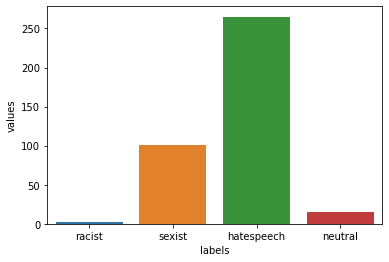

In [22]:
sns.barplot(data = df_frequency, x = 'labels', y = 'values')